In [0]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=9faf0011bdfb0481471bfc86bb5024508124c1af45f0cbb75359009f6d18366e
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [1]:
from dataset_builder import gp_builder,switcher,imobj

builder = gp_builder('coco')
builder.download_and_prepare()
train_dataset,val_dataset = builder._get_data()

['/content/train2017', '/content/val2017', '/content/annotations', '/content/sample_data']


100%|██████████| 5000/5000 [00:00<00:00, 210697.05it/s]


Succeful engagement : 117266 , Unsecceful engagement : 1021
length of read imags : 117266 , length of annotations corresponding to images 118287
length of downloaded images : 118287


In [2]:
train_dataset[0]

 [[[31.64, 241.98, 174.02, 360.99], 'person'],
  [[0.0, 273.99, 66.8, 242.91], 'person'],
  [[121.97, 103.8, 249.69, 453.45], 'elephant'],
  [[450.45, 298.45, 12.55, 53.42], 'elephant']]]

In [15]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

     |████████████████████████████████| 28.3MB 1.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


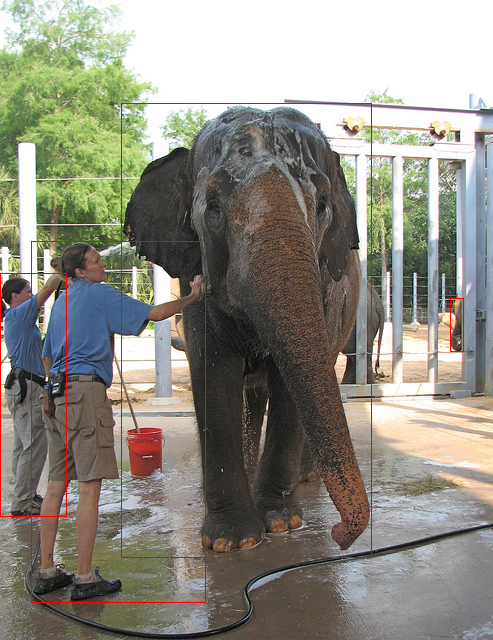

In [25]:
from google.colab.patches import cv2_imshow
from dataset_builder import visualize_img
img = train_dataset[0][0].eval()
bboxes = [bbox[0] for bbox in train_dataset[0][1]]
classes = [bbox[1] for bbox in train_dataset[0][1]]

def visualize_img(img,bboxes,color,thickness,classes):
    bboxes_points=[]
    for b in bboxes:
        startpoint = (int(b[0]),int(b[1]))
        endpoint = (int(b[0]+b[2]),int(b[1]+b[3]))
        bboxes_points.append([startpoint,endpoint])
    for i,box in enumerate(bboxes_points):
        box = cv2.rectangle(img,box[0],box[1],color,thickness)
        
    cv2_imshow(box)

visualize_img(img,bboxes,(0,0,255),1,classes)